In [1]:
%matplotlib inline
# %matplotlib widget
%load_ext autoreload
%autoreload 2
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import sys
sys.path.insert(0, 'functions/')
from h5_tools import *
from fitting_tools import *

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from Xana import Xana
import glob
import re
from lmfit.models import LinearModel
from pathlib import Path
from tqdm import tqdm
import glob
#plt.style.use('../nbstyle.mplstyle')
mpl.rcParams.update({"axes.grid" : True, "grid.color": "gray", "grid.linestyle":":", "grid.alpha": "0.7"})

In [3]:
datadir = '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/'
anadir = '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed'
h5dir = '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/h5-files/'

# Comparison, analysis, etc

In [4]:
# select concentration
conc = 'c1'
qv = np.array([0.028, 0.068, 0.108, 0.148, 0.188, 0.228, 0.268, 0.308, 0.348, 0.388, 0.428, 0.468])

# load files and parameters
files = sorted(glob.glob(f"../03-source/chi4/chi4_{conc}*.npz"))
temps = np.unique([int(file[-14:-11]) for file in files])
inds = np.unique([int(file[-5:-4]) for file in files])

print(f"Temperatures available for {conc}: {temps}")


Temperatures available for c1: [210 220 230 240 250]


## q dependence of all temperatures

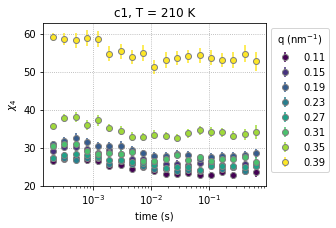

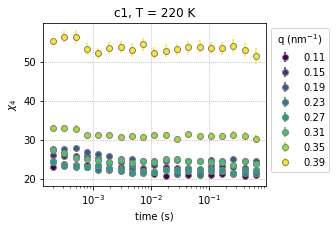

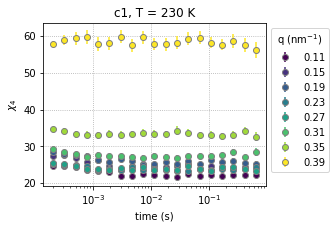

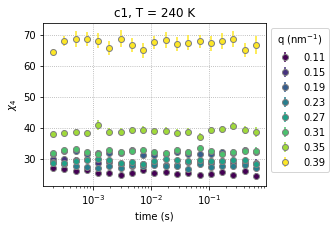

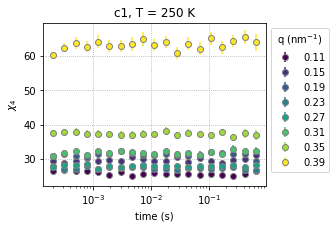

In [5]:
for T in temps:
    plt.figure(figsize=(4,3))
    col = plt.cm.viridis(np.linspace(0,1,len(inds)))
    
    for i,ind in enumerate(inds):
        f = np.load(f"../03-source/chi4/chi4_{conc}_{T}K_qind{ind}.npz")
        plt.errorbar(f['time'], f['chi4'], f['dchi4'], c=col[i], label=f'{qv[ind]:.2f}', ls='', marker='o', mec='gray')

    plt.legend(title='q (nm$^{-1}$)', bbox_to_anchor=[1,1])
    plt.title(f'{conc}, T = {T} K')
    plt.xscale('log')
    plt.xlabel('time (s)')
    plt.ylabel('$\chi_4$')

# q dependence of one temperature

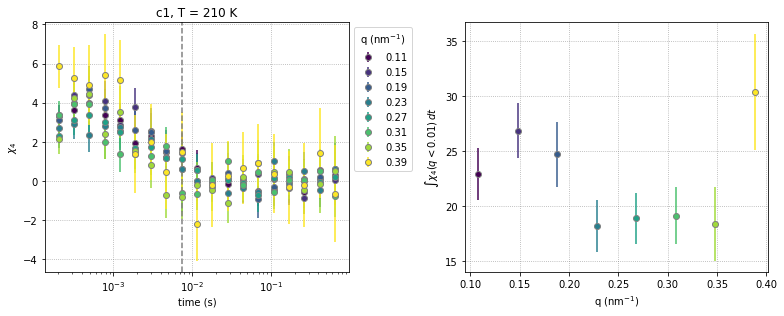

In [6]:
T_sel = temps[0]
q_int = 8

f, (a1,a2) = plt.subplots(1,2,figsize=(11,4.5), tight_layout=True)
col = plt.cm.viridis(np.linspace(0,1,len(inds)))


for i,ind in enumerate(inds):
    f = np.load(f"../03-source/chi4/chi4_{conc}_{T_sel}K_qind{ind}.npz")

    base = np.mean( f['chi4'][-10:])
    print(ind, base)
    a1.errorbar(f['time'], f['chi4']-base, f['dchi4'], c=col[i], label=f'{qv[ind]:.2f}', ls='', marker='o', mec='gray')
    std_sum = np.sqrt(np.sum(f['dchi4'][:q_int]**2))
    # a2.errorbar(qv[ind], np.trapz(f['chi4'][:q_int]-base, f['time'][:q_int]), std_sum, ls='', c=col[i], marker='o', mec='gray')
    a2.errorbar(qv[ind], np.sum(f['chi4'][:q_int]-base), std_sum, ls='', c=col[i], marker='o', mec='gray')

# a1.axvline(x=1e-2, ls='--', c='gray')
a1.axvline(x=f['time'][q_int], ls='--', c='gray')

a1.legend(title='q (nm$^{-1}$)', bbox_to_anchor=[1,1])
a1.set_title(f'{conc}, T = {T_sel} K')
a1.set_xscale('log')
a1.set_xlabel('time (s)')
a1.set_ylabel('$\chi_4$')

a2.set_xlabel('q (nm$^{-1}$)')
a2.set_ylabel(f"$\int\chi_4(q<{f['time'][q_int]:.2f})\,dt$");


**All temps q dependence**

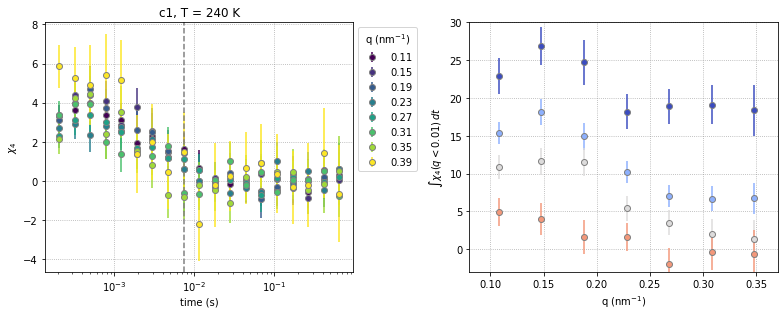

In [7]:
T_sel = temps[0]
q_int = 8

f, (a1,a2) = plt.subplots(1,2,figsize=(11,4.5), tight_layout=True)
col = plt.cm.viridis(np.linspace(0,1,len(inds)))
col2 = plt.cm.coolwarm(np.linspace(0,1,len(temps)))

for j,T in enumerate(temps[:-1]):
    T_sel = temps[j]

    for i,ind in enumerate(inds):
        f = np.load(f"../03-source/chi4/chi4_{conc}_{T_sel}K_qind{ind}.npz")

        base = np.mean( f['chi4'][-10:])
        if j == 0:
            a1.errorbar(f['time'], f['chi4']-base, f['dchi4'], c=col[i], label=f'{qv[ind]:.2f}', ls='', marker='o', mec='gray')
        std_sum = np.sqrt(np.sum(f['dchi4'][:q_int]**2))
        # a2.errorbar(qv[ind], np.trapz(f['chi4'][:q_int]-base, f['time'][:q_int]), std_sum, ls='', c=col[i], marker='o', mec='gray')
        a2.errorbar(qv[ind], np.sum(f['chi4'][:q_int]-base), std_sum, ls='', c=col2[j], marker='o', mec='gray')

# a1.axvline(x=1e-2, ls='--', c='gray')
a1.axvline(x=f['time'][q_int], ls='--', c='gray')

a1.legend(title='q (nm$^{-1}$)', bbox_to_anchor=[1,1])
a1.set_title(f'{conc}, T = {T_sel} K')
a1.set_xscale('log')
a1.set_xlabel('time (s)')
a1.set_ylabel('$\chi_4$')

a2.set_xlim(0.08, 0.37)
a2.set_ylim(-3,30)
# a2.legend(temps[:-1], [])
a2.set_xlabel('q (nm$^{-1}$)')
a2.set_ylabel(f"$\int\chi_4(q<{f['time'][q_int]:.2f})\,dt$");


## all concs

In [8]:
# load files and parameters
files = sorted(glob.glob(f"../03-source/chi4/chi4_{conc}*.npz"))
temps = np.unique([int(file[-14:-11]) for file in files])
inds = np.unique([int(file[-5:-4]) for file in files])

end
end
end


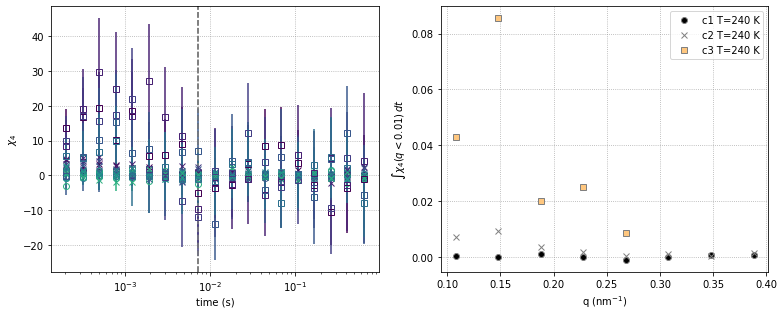

In [9]:
concs = ['c1', 'c2', 'c3']
f, (a1,a2) = plt.subplots(1,2,figsize=(11,4.5), tight_layout=True)
markers = ['o', 'x', 's']
col = plt.cm.viridis(np.linspace(0,1,len(qv)))
col2 = plt.cm.copper(np.linspace(0,1,len(concs)))

for j,conc in enumerate(concs):
    files = sorted(glob.glob(f"../03-source/chi4/chi4_{conc}*.npz"))
    temps = np.unique([int(file[-14:-11]) for file in files])
    inds = np.unique([int(file[-5:-4]) for file in files])

    T_sel, q_int = 240, 8

    integ = []
    for i,ind in enumerate(inds):
        f = np.load(f"../03-source/chi4/chi4_{conc}_{T_sel}K_qind{ind}.npz")
        base = np.mean( f['chi4'][-10:])
        a1.errorbar(f['time'], f['chi4']-base, f['dchi4'], c=col[i], label=f'{qv[ind]:.2f}', ls='', marker=markers[j], mfc='none')
        integ.append(np.trapz(f['chi4'][:q_int]-base, f['time'][:q_int]))

        # a2.plot(qv[ind], np.trapz(f['chi4'][:q_int]-base, f['time'][:q_int]), ls='', c=col[i], marker=markers[j], mec='gray')
    print("end")
    a2.plot(qv[inds], integ, ls='', c=col2[j], marker=markers[j], mec='gray', label=f'{conc} T={T_sel} K')

    # a1.axvline(x=1e-2, ls='--', c='gray')
    a1.axvline(x=f['time'][q_int], ls='--', c='gray')

    # a1.legend(title='q (nm$^{-1}$)', bbox_to_anchor=[1,1])
    # a1.set_title(f'T = {T_sel} K')
    a1.set_xscale('log')
    a1.set_xlabel('time (s)')
    a1.set_ylabel('$\chi_4$')
    a2.legend()
    a2.set_xlabel('q (nm$^{-1}$)')
    a2.set_ylabel(f"$\int\chi_4(q<{f['time'][q_int]:.2f})\,dt$");


# Calculate $\chi_4$

## Analysis database

In [5]:
# datafolder = 'ferritin_conc_gly_50_6' #
# datasetnumber = 4 # 230 K

# c2
# runnames = ['ferritin_conc100_gly_50_1', 'ferritin_conc100_gly_50_1', 'ferritin_conc100_gly_50_1', 'ferritin_conc100_gly_50_1']
# datasetnumbers = [12,6,9]


# temps
datafolder = 'ferritin_conc_gly_50_6'
datasetnumber = 5 # [2,3,4,5,6] [250, 240, 230, 220, 210]

# datafolder = 'ferritin_conc100_gly_50_1'
# datasetnumber = 9

# datafolder = 'ferritin_conc120_gly_50_1'
# datasetnumber = 7

In [6]:
ana_db_files = glob.glob(f'{anadir}/results/{datafolder}_{datasetnumber:04d}/p*/analysis_database.pkl')
# ana_db_files = glob(f'{anadir}/results/{datafolder}_{datasetnumber:04d}/p34*/analysis_database.pkl') # for c2
ana_db_files

['/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/results/ferritin_conc_gly_50_6_0005/p338272/analysis_database.pkl',
 '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/results/ferritin_conc_gly_50_6_0005/p338282/analysis_database.pkl',
 '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/results/ferritin_conc_gly_50_6_0005/p338235/analysis_database.pkl',
 '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/results/ferritin_conc_gly_50_6_0005/p338284/analysis_database.pkl']

In [7]:
d = Xana(fmtstr='ebs_id10_eiger500k', detector='eiger500k', setupfile=f'{anadir}/mask-setup/setup-fullmask-cryo-230417.pkl')
maskfile = d.setup.maskfile
d = Xana(fmtstr='ebs_id10_eiger500k', detector='eiger500k', setupfile=f'{anadir}/mask-setup/setup-fullmask-cryo-230417.pkl', maskfile=maskfile)

for i, f in enumerate(ana_db_files):
    if i == 0:
        d.load_db(f)
    else:
        d.append_db(f)

Loaded setupfile:
	/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/mask-setup/setup-fullmask-cryo-230417.pkl.
Loaded setupfile:
	/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/mask-setup/setup-fullmask-cryo-230417.pkl.
Try loading database:
	/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/results/ferritin_conc_gly_50_6_0005/p338272/analysis_database.pkl
Successfully loaded database


In [8]:
def get_scan_number(s):
    s = str(s)
    s = re.search('(?<=scan)\d{4}', s)
    if s is not None:
        return int(s.group(0))
    else:
        return -1
    
def get_rep(x, reps_per_spot=1):
    scan = get_scan_number(x)
    rep = scan % reps_per_spot
    if rep == 0:
        rep = 4
    return rep

In [9]:
d.db['rep'] = d.db['master'].apply(lambda x: get_rep(x, reps_per_spot=4))
d.db['scannumber'] = d.db['datdir'].apply(lambda x: get_scan_number(str(x)))

In [10]:
rep = 1
ind_xpcs = d.db[(d.db['analysis'] == 'xpcs')
                & (d.db['rep'] == rep)].index.values
print(f"number of xpcs analysis: {len(ind_xpcs)}")
d.db.loc[ind_xpcs]

number of xpcs analysis: 112


,use,sample,analysis,mod,savname,savfile,setupfile,comment,series,t_exposure,t_readout,nframes,master,first,last,datdir,rep,scannumber
1,True,,xpcs,2023-06-20 07:06:41.666826,s0001_0001.pkl,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...,,1.0,0.0002,0.000003,4990.0,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...,10.0,4999.0,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...,1,1
9,True,,xpcs,2023-06-20 07:17:23.661648,s0005_0009.pkl,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...,,5.0,0.0002,0.000003,4990.0,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...,10.0,4999.0,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...,1,5
17,True,,xpcs,2023-06-20 07:28:06.573056,s0009_0017.pkl,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...,,9.0,0.0002,0.000003,4990.0,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...,10.0,4999.0,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...,1,9
25,True,,xpcs,2023-06-20 07:38:47.989202,s0013_0025.pkl,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...,,13.0,0.0002,0.000003,4990.0,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...,10.0,4999.0,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...,1,13
33,True,,xpcs,2023-06-20 07:49:27.844017,s0017_0033.pkl,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...,,17.0,0.0002,0.000003,4990.0,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...,10.0,4999.0,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,True,,xpcs,2023-06-20 13:40:45.097560,s0317_0185.pkl,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...,,317.0,0.0002,0.000003,4990.0,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...,10.0,4999.0,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...,1,317
865,True,,xpcs,2023-06-20 13:51:20.178482,s0321_0193.pkl,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...,,321.0,0.0002,0.000003,4990.0,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...,10.0,4999.0,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...,1,321
873,True,,xpcs,2023-06-20 14:01:54.933216,s0325_0201.pkl,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...,,325.0,0.0002,0.000003,4990.0,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...,10.0,4999.0,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...,1,325
881,True,,xpcs,2023-06-20 14:12:29.692693,s0329_0209.pkl,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/202206...,,329.0,0.0002,0.000003,4990.0,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...,10.0,4999.0,/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/ferrit...,1,329


# Compute $\chi_4$

From other paper:
```
chi4 = vartrc(ttc)
chi4 /= np.average(ttc)**2

y = chi4[:] - np.average(chi4[-500:-100])
chis[i,:] = y
xchis[i,:] = xtime[1:-1]
```

where 

```
def vartrc(ttc):
    """Calculate the variance of the two-time correlation function."""
    n, tmp = np.shape(ttc)
    ttc_var = []
    for i in range(1, n - 1):
        ttc_var.append(np.var(np.diag(ttc, i)))
    return ttc_var
```

In [11]:
def var(ttc):
    """Calculate the variance of the two-time correlation function.
    Args: ttc two-time correlation function (2d array)
    To normalize:
        chi4 = vartrc(ttc)
        chi4 /= np.average(ttc)**2
    """
    n, tmp = np.shape(ttc)
    chi4 = []
    
    for off_diag in range(1, n-1):
        chi4.append(np.var(np.diag(ttc, off_diag)))
    
    # chi4 /= np.average(ttc)**2

    return chi4

def var_norm(ttc):
    """Calculate the variance of the two-time correlation function.
    Args: ttc two-time correlation function (2d array)
    To normalize:
        chi4 = vartrc(ttc)
        chi4 /= np.average(ttc)**2
    """
    n, tmp = np.shape(ttc)
    ttc_var = []
    
    for i in range(1, n-1):
        ttc_var.append(np.var(np.diag(ttc, i)))
    chi4 = ttc_var / np.average(np.diag(ttc, k=1))**2

    return chi4

def load_ttc(filename, qpar=2, rep=0, vs=(0,0.15), ttc_key='/xpcs/ttcs/ttc_rep_qs_avg_filtered'):
    """ Load average twotime correlation function for different a given momentum transfer """
    ttc_qv = load_data(filename, '/xpcs/ttcs/q')
    # ttc_pars = load_data(filename, '/xpcs/ttcs/twotime_par')
    time = load_data(filename, '/xpcs/ttcs/times')

    qv = d.get_item(ind_xpcs[0])['qv'][qpar]

    with h5py.File(filename, 'r') as f:
        ttc = np.asarray(f[ttc_key][qpar])[rep,:,:]
    
    return ttc, qv

In [58]:
# %%timeit
chi4s_1 = []
chi4s2 = []
avg_ttcs = []
avg_diag_ttcs = []
time = d.get_item(ind_xpcs[0])['twotime_xy'][1:-1]

for i,ind in tqdm(enumerate(ind_xpcs[:]), desc='index', leave=False, total=len(ind_xpcs)):
    # chi4s2.append(var_norm(list(d.get_item(ind)['twotime_corf'].values())[2]))
    ttc = list(d.get_item(ind)['twotime_corf'].values())[2]
    chi4s2.append(var(ttc))
    chi4s_1.append(var(ttc-1))
    avg_ttcs.append(np.mean(ttc))
    avg_diag_ttcs.append(np.mean(np.diag(ttc)))

/tmp/ipykernel_45546/3506419122.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


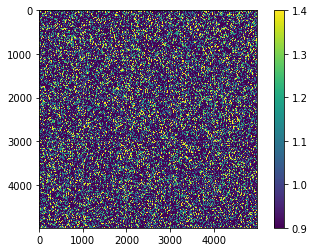

In [37]:
plt.figure()
plt.imshow(ttc, vmin=.9, vmax=1.4)
plt.colorbar()

In [69]:
import scipy.special as special

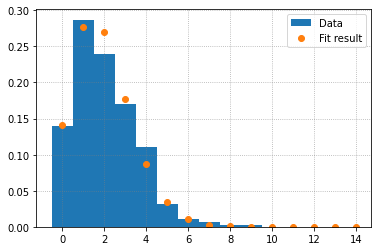

In [72]:
def poisson(l,k):
    y = l**k * np.exp(-l) / special.factorial(k)
    return y

# import numpy as np
# import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

# get poisson deviated random numbers
data = np.random.poisson(2, 1000)

# the bins should be of integer width, because poisson is an integer distribution
bins = np.arange(11) - 0.5
entries, bin_edges, patches = plt.hist(data, bins=bins, density=True, label='Data')

# calculate bin centers
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])


def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)


# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, bin_centers, entries)

# plot poisson-deviation with fitted parameter
x_plot = np.arange(0, 15)

plt.plot(
    x_plot,
    fit_function(x_plot, *parameters),
    marker='o', linestyle='',
    label='Fit result',
)
plt.legend()
plt.show()

TypeError: _parse_args() takes from 2 to 3 positional arguments but 4 were given

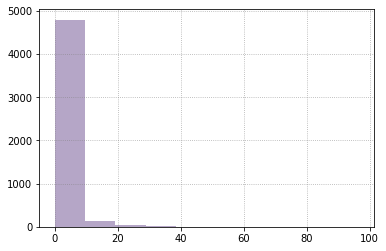

In [76]:
plt.figure()
cols = plt.cm.viridis(np.linspace(0,1,12))
for k in range(1,10):
    # plt.plot(np.diag(ttc, k=k),  marker='o', ms=2, c=cols[k])
    entries, bin_edges, patches = plt.hist(np.diag(ttc, k=k), color=cols[k], alpha=.4)#, bins=np.logspace(-2,2,20))
    # calculate bin centers
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    popt,xc,curve,perr = fit(poisson, bin_centers, entries, p0=[1.,0.5])
    print(popt)

    plt.plot(xc,curve,'r--')
# plt.xlim(0,10)



In [13]:
# filename = h5dir + f'{datafolder}_{datasetnumber:04d}.h5'
# print(filename)
# ttc, qv_ttc = load_ttc(filename)#, qpar=2, rep=0, vs=(0,0.15), ttc_key='/xpcs/ttcs/ttc_rep_qs_avg_filtered')
# chi4_ttc = var_norm(ttc)

In [14]:
print(np.shape(chi4s2))
chi4_2, dchi4_2 = np.mean(chi4s2, axis=0), np.std(chi4s2, axis=0) / np.sqrt(len(chi4s1))
# chi4_1, dchi4_1 = np.mean(chi4s1, axis=0), np.std(chi4s1, axis=0) / np.sqrt(len(chi4s1))

(112, 4988)


/tmp/ipykernel_45546/4227618339.py:2: RuntimeWarning: divide by zero encountered in divide
  chi4_2, dchi4_2 = np.mean(chi4s2, axis=0), np.std(chi4s2, axis=0) / np.sqrt(len(chi4s1))


In [17]:
avg_ttcs[:10]

[0.96842045,
 0.9670537,
 0.96097,
 0.957117,
 0.9562515,
 0.95392674,
 0.9568503,
 0.946873,
 0.952528,
 0.9480339]

/tmp/ipykernel_45546/3368263131.py:27: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  a1.set_xlim(0,1)
/tmp/ipykernel_45546/3368263131.py:31: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  a2.set_xlim(0,1)


Text(0.5, 1.0, 'ferritin_conc_gly_50_6 5')

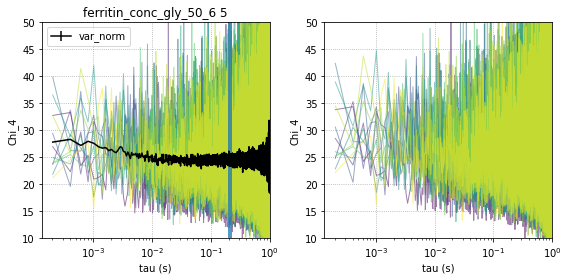

In [18]:
fig, (a1,a2) = plt.subplots(1,2, figsize=(8,4), tight_layout=True)
cs = plt.cm.viridis(np.linspace(0,1,len(chi4s2)))

for i in range(0,len(chi4s2),10):
    a1.plot(time, chi4s2[i], lw=1, c=cs[i], alpha=.5)

for i in range(0,len(chi4s2),10):
    # a2.plot(time, chi4s2[i]/avg_diag_ttcs[i], lw=1, c=cs[i], alpha=.5)
    a2.plot(time, chi4s2[i] / avg_ttcs[i], lw=1, c=cs[i], alpha=.5)

#     a2.plot(time, chi4s1[i], lw=1, c=cs[i], alpha=.5)

# plt.plot(time, chi4, '-k', label='avg')
a1.errorbar(time, chi4_2, dchi4_2, c='k', ls='-', label='var_norm') # marker='o', mfc='none',
# a1.errorbar(time, chi4_2 / , dchi4_2, c='k', ls='-', label='var_norm') # marker='o', mfc='none',
# a1.errorbar(time, chi4_1, dchi4_1, c='r', ls='-', label='var') # marker='o', mfc='none',

a1.axvline(x=time[1000])
a1.axvline(x=time[1100])
a1.set_xscale('log')
a2.set_xscale('log')
a1.legend()
a1.grid(ls=':', c='gray', alpha=0.7)
a1.set_xlabel('tau (s)')
a1.set_ylabel('Chi_4')
a1.set_ylim(10,50)
a1.set_xlim(0,1)
a2.set_xlabel('tau (s)')
a2.set_ylabel('Chi_4')
a2.set_ylim(10,50)
a2.set_xlim(0,1)
a1.set_title(f'{datafolder} {datasetnumber}')

**Check statistics**

Text(0.5, 0, '$\\chi_4(t=t_0)$')

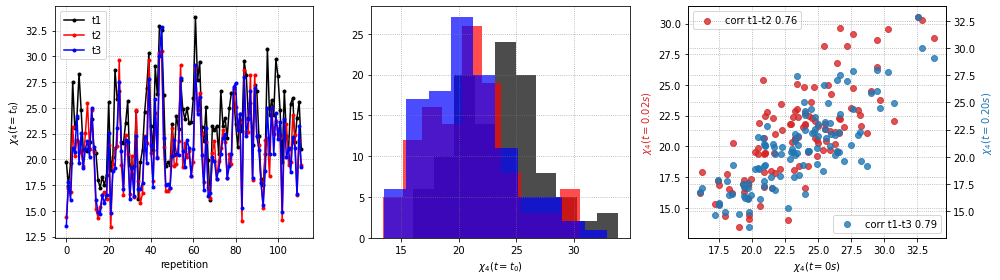

In [74]:
f, (a1,a2,a3) = plt.subplots(1,3, figsize=(14,4), tight_layout=True)
l1,l2,l3 = [], [], []
a4 = a3.twinx()

for i in range(np.shape(chi4s2)[0]):
    l1.append(np.mean(chi4s2[i][:4]))
    l2.append(np.mean(chi4s2[i][100:110]))
    l3.append(np.mean(chi4s2[i][1000:1100]))

a1.plot(l1, ls='-', c='k', marker='o', ms=3, label='t1')
a1.plot(l2, ls='-', c='r', marker='o', ms=3, label='t2')
a1.plot(l3, ls='-', c='b', marker='o', ms=3, label='t3')

a2.hist(l1, bins=10, color='k', alpha=0.7, label='t1')
a2.hist(l2, bins=10, color='r', alpha=0.7, label='t2')
a2.hist(l3, bins=10, color='b', alpha=0.7, label='t3')

cor12 = np.corrcoef(l1,l2)[0,1]
cor13 = np.corrcoef(l1,l3)[0,1]
x = np.linspace(np.min(l1), np.max(l1), 100)
a3.scatter(l1,l2, c='C3', alpha=0.8, label=f'corr t1-t2 {cor12:.2f}')
a4.scatter(l1,l3, c='C0', alpha=0.8, label=f'corr t1-t3 {cor13:.2f}')
# a3.plot(x, x*cor, c='r')
a3.set_xlabel(f'$\chi_4(t=0 s)$')
a3.set_ylabel(f'$\chi_4(t={time[100]:.2f} s)$', c='C3')
a4.set_ylabel(f'$\chi_4(t={time[1000]:.2f} s)$', c='C0')
a3.legend(loc='upper left')
a4.legend(loc='lower right')

a1.legend()
a1.set_xlabel('repetition')
a1.set_ylabel(r'$\chi_4(t=t_0)$')
a2.set_xlabel(r'$\chi_4(t=t_0)$')


### log interpolation

In [23]:
import scipy as sp
import scipy.interpolate

def log_interp1d(xx, yy, kind='linear'):

    result = np.where(yy > 0.0000000001, yy, -10)
    logy = np.log10(result, out=result, where=result > 0)


    logx = np.log10(xx)
    # logy = np.log10(yy)
    lin_interp = sp.interpolate.interp1d(logx, logy, kind=kind)
    log_interp = lambda zz: np.power(10.0, lin_interp(np.log10(zz)))

    return log_interp

/tmp/ipykernel_62341/131742058.py:47: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  a1.set_xlim(0,1)
/tmp/ipykernel_62341/131742058.py:51: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  a2.set_xlim(0,1)


Text(0.5, 1.0, 'ferritin_conc_gly_50_6 5')

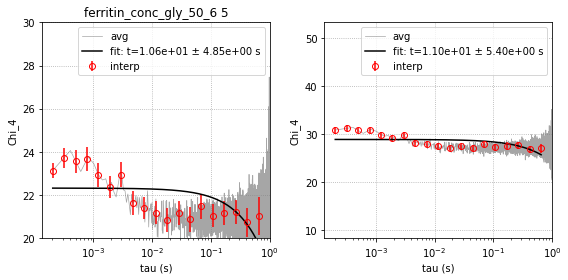

In [24]:
fig, (a1,a2) = plt.subplots(1,2, figsize=(8,4), tight_layout=True)
cs = plt.cm.viridis(np.linspace(0,1,len(chi4s2)))

new_x = np.logspace(np.log10(time[0]), np.log10(time[-1]), 20)
f = log_interp1d(time[:], chi4_2[:])
df = log_interp1d(time[:], dchi4_2[:])

base = np.mean(f(new_x)[-8:-1])
# a1.errorbar(time, chi4_2, dchi4_2, c='gray', ls='-', alpha=0.7,lw=0.7, label='avg')
a1.plot(time, chi4_2, c='gray', ls='-', alpha=0.7,lw=0.7, label='avg')
# a1.plot(new_x[:-1], f(new_x)[:-1], c='r', marker='o', mfc='none', ls='', label='interp')
a1.errorbar(new_x[:-1], f(new_x)[:-1], df(new_x)[:-1],c='r', marker='o', mfc='none', ls='', label='interp')
# -- fit

popt,xc,curve,perr = fit(exponential, new_x[:-1], f(new_x)[:-1], sigma= df(new_x)[:-1], p0=[2.5,5e-3], bounds=[(0,0),(np.infty,np.infty)])
a1.plot(xc, curve, ls='-', c='k', label=f'fit: t={popt[1]:.2e} ± {perr[1]:.2e} s')

f1 = log_interp1d(time[:], chi4_1[:])
df1 = log_interp1d(time[:], dchi4_1[:])
base1 = np.mean(f1(new_x)[-8:-1])
# a1.errorbar(time, chi4_1, dchi4_1, c='gray', ls='-', alpha=0.7,lw=0.7, label='avg')
a2.plot(time, chi4_1, c='gray', ls='-', alpha=0.7,lw=0.7, label='avg')
# a1.plot(new_x[:-1], f(new_x)[:-1], c='r', marker='o', mfc='none', ls='', label='interp')
a2.errorbar(new_x[:-1], f1(new_x)[:-1], df1(new_x)[:-1],c='r', marker='o', mfc='none', ls='', label='interp')

popt,xc,curve,perr = fit(exponential, new_x[:-1], f1(new_x)[:-1], sigma= df1(new_x)[:-1], p0=[2.5,5e-3], bounds=[(0,0),(np.infty,np.infty)])
a2.plot(xc, curve, ls='-', c='k', label=f'fit: t={popt[1]:.2e} ± {perr[1]:.2e} s')

# from ttc avg
# f2 = log_interp1d(time[:], chi4_ttc[:])
# base = np.mean(f2(new_x)[-8:-1])
# a1.plot(new_x[:-1], f2(new_x)[:-1], c='b', ls='', alpha=0.7, marker='s', mfc='none', label='from ttc')
# a1.plot(time[:-100], chi4_ttc[:-100], c='b', ls='', alpha=0.7, marker='s', mfc='none', label='from ttc')


# a1.plot(new_x, np.zeros(len(new_x)), c='r', marker='x', mfc='none', ls='-', label='interp')
# a2.errorbar(time, chi4_1, dchi4_1, c='k', marker='o', mfc='none', ls='', label='avg')

a1.set_xscale('log')
a2.set_xscale('log')
a1.legend()
a2.legend()
a1.grid(ls=':', c='gray', alpha=0.7)
a1.set_xlabel('tau (s)')
a1.set_ylabel('Chi_4')
a1.set_ylim(20,30)
a1.set_xlim(0,1)
a2.set_xlabel('tau (s)')
a2.set_ylabel('Chi_4')
# a2.set_ylim(-10,10)
a2.set_xlim(0,1)
a1.set_title(f'{datafolder} {datasetnumber}')

In [101]:
save = False
if save:
    np.savez('../03-source/chi4_c1_210K', time=new_x[:-1], chi4=f(new_x)[:-1], dchi4=df(new_x)[:-1])

## concentrations

In [83]:
cs = ['c1', 'c2', 'c3']
times_240, chis_240, dchis_240 = [], [], []

for c in cs:
    f = np.load(f'../03-source/chi4_{c}_240K.npz')
    chis_240.append(f['chi4'])
    dchis_240.append(f['dchi4'])
    times_240.append(f['time'])

/tmp/ipykernel_62908/119960247.py:23: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  a1.set_xlim(0,1)


Text(0.5, 0, 'concentrations')

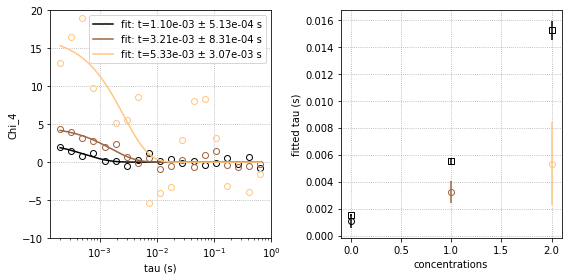

In [56]:
f, (a1,a2) = plt.subplots(1,2, figsize=(8,4), tight_layout=True)
col = plt.cm.copper(np.linspace(0,1,len(cs)))

taus_g2 = [1.54e-3, 5.5e-3, 15.23e-3]
dtaus_g2 = [0.07e-3, 0.2e-3, 0.7e-3]

for i in range(len(cs)):
    b = np.mean(chis_240[i][-7:])
    a1.plot(times_240[i], chis_240[i]-b,  marker='o', mfc='none', ls='', c=col[i])
    
    popt,xc,curve,perr = fit(exponential, times_240[i], chis_240[i]-b, sigma=dchis_240[i], p0=[2.5,5e-3], bounds=[(0,0),(np.infty,np.infty)])
    a1.plot(xc, curve, ls='-', c=col[i], label=f'fit: t={popt[1]:.2e} ± {perr[1]:.2e} s')

    a2.errorbar(i, popt[1], perr[1], ls='', marker='o', c=col[i], mfc='none')
    a2.errorbar(i, taus_g2[i], dtaus_g2[i], ls='', c='k', marker='s', mfc='none')

a1.grid(ls=':', c='gray', alpha=0.7)
a1.set_xlabel('tau (s)')
a1.set_ylabel('Chi_4')
a1.set_xscale('log')
a1.legend()
a1.set_ylim(-10,20)
a1.set_xlim(0,1)

a2.set_ylabel('fitted tau (s)')
a2.set_xlabel('concentrations')

## temperatures

In [102]:
ts = [250,240,230,220,210]
times_c1, chis_c1, dchis_c1 = [], [], []

for t in ts:
    f = np.load(f'../03-source/chi4_c1_{t}K.npz')
    chis_c1.append(f['chi4'])
    dchis_c1.append(f['dchi4'])
    times_c1.append(f['time'])

/tmp/ipykernel_62908/2904883835.py:25: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  a1.set_xlim(0,1)


Text(0.5, 0, 'Temp (K)')

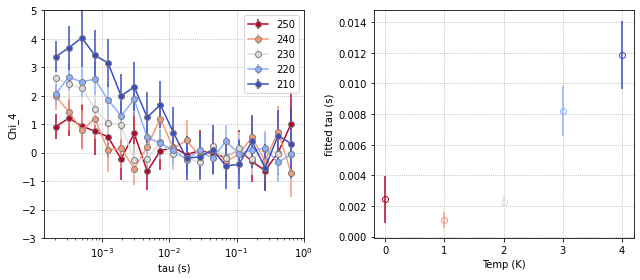

In [108]:
f, (a1,a2) = plt.subplots(1,2, figsize=(9,4), tight_layout=True)
col = plt.cm.coolwarm_r(np.linspace(0,1,len(ts)))

# taus_g2 = [1.54e-3, 5.5e-3, 15.23e-3]
# dtaus_g2 = [0.07e-3, 0.2e-3, 0.7e-3]

for i in range(len(ts)):
    b = np.mean(chis_c1[i][-7:])
    # a1.errorbar(times_c1[i], chis_c1[i]-b, dchis_c1[i],  marker='o', mfc='none', ls='', c=col[i], label=f'{ts[i]}')
    # a1.errorbar(times_c1[i], chis_c1[i]-b, dchis_c1[i],  marker='o', ls='', c=col[i], label=f'{ts[i]}')
    a1.errorbar(times_c1[i], chis_c1[i]-b, dchis_c1[i],  marker='o', mec='gray', ls='-', c=col[i], label=f'{ts[i]}')
    
    popt,xc,curve,perr = fit(exponential, times_c1[i], chis_c1[i]-b, sigma=dchis_c1[i], p0=[2,8e-3], bounds=[(0,0),(np.infty,np.infty)])
    # a1.plot(xc, curve, ls='-', c=col[i])#, label=f'fit: t={popt[1]:.2e} ± {perr[1]:.2e} s')

    a2.errorbar(i, popt[1], perr[1], ls='', marker='o', c=col[i], mfc='none')
    # a2.errorbar(i, taus_g2[i], dtaus_g2[i], ls='', c='k', marker='s', mfc='none')

a1.grid(ls=':', c='gray', alpha=0.7)
a1.set_xlabel('tau (s)')
a1.set_ylabel('Chi_4')
a1.set_xscale('log')
a1.legend()
a1.set_ylim(-3,5)
a1.set_xlim(0,1)

a2.set_ylabel('fitted tau (s)')
a2.set_xlabel('Temp (K)')

# TTC

In [23]:
qpar = 2
qv = d.get_item(ind_xpcs[0])['qv'][qpar]
ttc_1 = d.get_item(ind_xpcs[0])['twotime_corf'][qpar]

In [24]:
filename = h5dir + f'{datafolder}_{datasetnumber:04d}.h5'
ttc, qv_ttc = load_ttc(filename)#, qpar=2, rep=0, vs=(0,0.15), ttc_key='/xpcs/ttcs/ttc_rep_qs_avg_filtered')

/tmp/ipykernel_32576/508662769.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(shrink=.8)


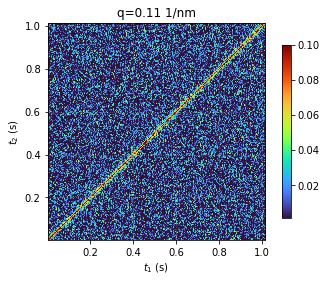

In [30]:
plt.figure()
norm = np.mean(ttc[:300,-300:])
plt.imshow(ttc-norm, cmap='turbo', extent=(time[0], time[-1])*2, origin='lower', vmax=1e-1, vmin=1e-3)
plt.xlabel('$t_1$ (s)')
plt.ylabel('$t_2$ (s)')
plt.title(f'q={qv:.2f} 1/nm')
plt.colorbar(shrink=.8)

/tmp/ipykernel_32576/1704467438.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(shrink=.8)


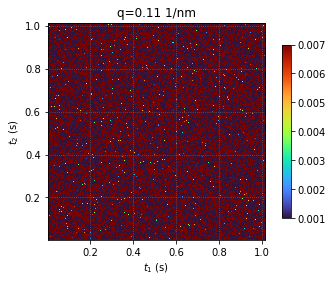

In [29]:
plt.figure()
norm = np.mean(ttc_1[:300,-300:])
plt.imshow(ttc_1-norm, cmap='turbo', extent=(time[0], time[-1])*2, origin='lower', vmax=7e-3, vmin=1e-3)

plt.xlabel('$t_1$ (s)')
plt.ylabel('$t_2$ (s)')
plt.title(f'q={qv:.2f} 1/nm')
plt.colorbar(shrink=.8)

In [ ]:

    
# for i in range(0,len(ttc_qv)):
#     ax = axs.ravel()[i]
#     norm = np.mean(ttcs[i,:300,-300:])


def plot_ttc(filename, rep=0, vs=(0,0.15), ttc_key='/xpcs/ttcs/ttc_rep_qs_avg_filtered'):
    """Plots the twotime correlation function for different momentum transfers"""
    ttc_qv = load_data(filename, '/xpcs/ttcs/q')
    # ttc_pars = load_data(filename, '/xpcs/ttcs/twotime_par')
    time = load_data(filename, '/xpcs/ttcs/times')
    
    ttcs = np.empty(shape=(len(ttc_qv), len(time), len(time)))
    with h5py.File(filename, 'r') as f:
        ttcs = np.asarray(f[ttc_key])[rep,:,:,:]
        
    # f, axs = plt.subplots(2,3,figsize=(10,6), tight_layout=True)
    f, axs = plt.subplots(2,5,figsize=(15,6), tight_layout=True)
    for i in range(0,len(ttc_qv)):
        ax = axs.ravel()[i]
        norm = np.mean(ttcs[i,:300,-300:])
        # vmax = np.mean(np.diag(ttcs[i,:,:],k=10))

        ax.imshow(ttcs[i,:,:]-norm, origin='lower', cmap='turbo', vmin=vs[0], vmax=vs[1], extent=(time[0],time[-1])*2 )
        ax.set_xlabel('$t_1 (s)$')
        ax.set_title(f'{ttc_qv[i]:.2f} 1/nm', fontsize=8)
        ax.set_ylabel('$t_2 (s)$')
        divider = make_axes_locatable(ax)
        cb1 = mpl.colorbar.ColorbarBase(divider.append_axes('right', size='5%', pad=0.05), cmap=mpl.cm.turbo,  orientation='vertical', norm=mpl.colors.Normalize(vmin=vs[0],vmax=vs[1]));


# Functions

In [ ]:
def vartrc(ttc):
        """Calculate the variance of the two-time correlation function.
        Args: ttc tto-time correlation function (2d array)
        To normalize:
            chi4 = vartrc(ttc)
            chi4 /= np.average(ttc)**2
        """
        n, tmp = np.shape(ttc)
        ttc_var = []
        
        for i in range(1, n-1):
            ttc_var.append(np.var(np.diag(ttc, i)))
#         chi4 = ttc_var / np.average(ttc)**2

        return ttc_var